<a href="https://colab.research.google.com/github/PaulineMacharia/dsc-phase-1-project/blob/master/Phase1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.


To explore the films that are currently doing the best in the film industry and provide actionable insights, the steps below will be carried out:


1.  Load Libraries
2.  Read and confirm the uploaded data
3.  Merge the datasets
4.  Data Cleaning
5.  Data Analysis







# Datasets used:


1.   title.basics.csv
2.   title.rating.csv
3.   bom.movie_gross.csv





# Load the libraries

In [1]:
#Load the Libraries
import numpy as np
import pandas as pd

In [2]:
#Load the three datasets into data structures called dataframes
df_basics=pd.read_csv('title.basics.csv')
df_ratings=pd.read_csv('title.ratings.csv')
df_movie_gross=pd.read_csv('bom.movie_gross.csv')

# Reading the data

In [3]:
#Check if data loaded successfully
df_ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [4]:
df_basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [5]:
#Read the first two rows of movie gross csv file
df_movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [6]:
#Read the last five rows of movie gross csv file
df_movie_gross.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


# Merging the three datasets(title.basics,title.ratings and bom.movie_gross) for easier analysis of data

Create a variable called basics_ratings_merge to merge title.basics.csv and title.ratings.csv into one file using the common column title 'tconst'. Use the inner join to merge the two datasets.

Then create another variable,basics_ratings_moviegross_merge, that merges basics_ratings_merge (containing title_basics and title_ratings) and bom.movie_gross.csv using the lsuffix and rsuffix.


In [7]:
#merging one row first tconst=tt0066787 for testing before merging all the rows in title.ratings to title.basics
ratings_one = df_basics.query("tconst == 'tt0066787'")

In [8]:
#confirming the merge of one entry
inner_merged = pd.merge(ratings_one, df_basics)
inner_merged.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [9]:
#merging all rows in title.ratings to title.basics.
#confirming the number of rows and columns merged.
basics_ratings_merge = pd.merge( df_ratings, df_basics, on=["tconst"])
basics_ratings_merge.shape

(73856, 8)

In [10]:
#Generating the first 5 rows to confirm the merge between the 2 datasets.
basics_ratings_merge.head(5)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [11]:
#Merging basics_ratings_merge (title.basic + title.ratings) to bom.movie_gross using columns title, which is a unique column in both basics and ratings,
#...and primary_title column which is a column in movie_gross file using inner join.
basics_ratings_moviegross_merge = basics_ratings_merge.join(df_movie_gross.set_index(["title"]),on=["primary_title"],how="inner",lsuffix="_x",rsuffix="_y",)
basics_ratings_moviegross_merge

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000,2014
10,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000,2013
12,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000,2014
16,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000,2011
17,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
73364,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",Magn.,5200.0,NaN,2015
73441,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",Magn.,177000.0,NaN,2016
73502,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Cohen,260000.0,NaN,2015
73548,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000,2018


In [12]:
#Confirm last 5 rows of the file
basics_ratings_moviegross_merge.sample()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
27842,tt1554091,7.2,14602,A Better Life,A Better Life,2011,98.0,"Drama,Romance",Sum.,1800000.0,NaN,2011


# Check Datatypes of the merged file

The merged file name is *basics_ratings_moviegross_merge*

In [13]:
basics_ratings_moviegross_merge.dtypes

tconst              object
averagerating      float64
numvotes             int64
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [14]:
#Check the statistical summary
basics_ratings_moviegross_merge.describe(include='all')

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
count,3027,3027.000000,3.027000e+03,3027,3027,3027.000000,2980.000000,3020,3024,3.005000e+03,1832,3027.000000
unique,3025,NaN,NaN,2598,2727,NaN,NaN,322,216,NaN,1006,NaN
top,tt6599340,NaN,NaN,Split,Eden,NaN,NaN,Drama,Uni.,NaN,1200000,NaN
freq,2,NaN,NaN,6,6,NaN,NaN,317,156,NaN,17,NaN
mean,NaN,6.457582,6.170030e+04,NaN,NaN,2013.783284,107.217114,NaN,NaN,3.064033e+07,NaN,2014.077635
std,NaN,1.012277,1.255132e+05,NaN,NaN,2.466955,20.073886,NaN,NaN,6.671629e+07,NaN,2.442245
min,NaN,1.600000,5.000000e+00,NaN,NaN,2010.000000,3.000000,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,5.900000,2.117000e+03,NaN,NaN,2012.000000,94.000000,NaN,NaN,1.390000e+05,NaN,2012.000000
50%,NaN,6.600000,1.310900e+04,NaN,NaN,2014.000000,105.000000,NaN,NaN,2.000000e+06,NaN,2014.000000
75%,NaN,7.100000,6.276550e+04,NaN,NaN,2016.000000,118.000000,NaN,NaN,3.250000e+07,NaN,2016.000000


# DATA EXPLORATION/CLEANING

**Explore the data in the merged file- basics_ratings_moviegross_merge :**

1.  Check for missing data.
2.  Identify any duplicates in the data.
3.  Identify invalid data

In [15]:
#get the missing values
missing_values=basics_ratings_moviegross_merge.isna()
missing_values

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,True,False,False
16,False,False,False,False,False,False,False,False,False,False,False,False
17,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
73364,False,False,False,False,False,False,False,False,False,False,True,False
73441,False,False,False,False,False,False,False,False,False,False,True,False
73502,False,False,False,False,False,False,False,False,False,False,True,False
73548,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#get the count of missing values
basics_ratings_moviegross_merge.isna().sum()

tconst                0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [17]:
# get the percentage of missing values to determine what to do with the columns and rows
def missing_values(basics_ratings_moviegross_merge):
    miss = basics_ratings_moviegross_merge.isnull().sum().sort_values(ascending = False)
    percentage_miss = (basics_ratings_moviegross_merge.isnull().sum() / len(basics_ratings_moviegross_merge)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(basics_ratings_moviegross_merge)
missing_data

,index,Missing Values,Percentage
0,foreign_gross,1195,0.394780
1,runtime_minutes,47,0.015527
2,domestic_gross,22,0.007268
3,genres,7,0.002313
4,studio,3,0.000991


# From the analysis above, the actions below will be carried out:


*   studio- Drop the 3 rows with null values.
*   genres- Drop the 7 rows with null values.
*   foreign_gross- replace the missing values with 0s.
*   domestic_gross- replace the missing values with 0s.
*   runtime_minutes- replace with the mean

The 3 rows in the studio column and the 7 rows in the genres column with null values would not have a great effect on the skewness of the data if dropped thats why the most like option would be dropping them. It is an insignificant percentage.







In [18]:
# drop all rows that contain null in studio column using dropna method
basics_ratings_moviegross_merge.dropna(subset=['studio'], inplace=True)

In [19]:
# drop all rows that contain null in genres column using dropna method
basics_ratings_moviegross_merge.dropna(subset=['genres'], inplace=True)

In [20]:
#it is safe to say the movies with null foreign_gross were not rated in terms of the international gross they acquire therefore,
#replace nan with 0
basics_ratings_moviegross_merge['foreign_gross'].replace(np.nan, 0, inplace=True, regex=False)

In [21]:
#it is likely the movies with null domestic_gross value were not evaluated and assigned a gross value therefore,
#replace nan with 0
basics_ratings_moviegross_merge['domestic_gross'].replace(np.nan, 0, inplace=True, regex=False)

In [22]:
#Replace the nulls in runtime_minutes with the mean
basics_ratings_moviegross_merge['runtime_minutes'].fillna(basics_ratings_moviegross_merge['runtime_minutes'].mean(), inplace=True)

In [23]:
missing_data = missing_values(basics_ratings_moviegross_merge)
missing_data

#missing data has been resolved.

,index,Missing Values,Percentage


In [24]:
#Check for duplicates
duplicate_rows= basics_ratings_moviegross_merge[basics_ratings_moviegross_merge.duplicated()]
duplicate_rows

#The data has no duplicates

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year


In [25]:
#Duplicated data count
basics_ratings_moviegross_merge.duplicated().sum()

0

Changing the datatypes of columns with wrong data types

In [26]:
basics_ratings_moviegross_merge.dtypes

tconst              object
averagerating      float64
numvotes             int64
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [27]:
# remove the , character from foreign_gross column
basics_ratings_moviegross_merge['foreign_gross'].replace(",", "", inplace=True, regex=True)

In [28]:
# remove the , character from domestic_gross column
basics_ratings_moviegross_merge['domestic_gross'].replace(",", "", inplace=True, regex=True)

In [29]:
# change the data type on foreign_gross column
def change_data_type(data, cols, type):
    """Simple function to change columns data type"""
    for col in cols:
        data[col] = data[col].astype(type) # changes dtypes

    return data.dtypes # confirm the data types


change_data_type(basics_ratings_moviegross_merge, ["foreign_gross"], 'float')

tconst              object
averagerating      float64
numvotes             int64
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
dtype: object

# Identifying outliers

In [30]:
basics_ratings_moviegross_merge.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,2014
10,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,2013
12,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,0.0,3400000.0,2014
16,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,2011
17,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,2010


<Axes: >

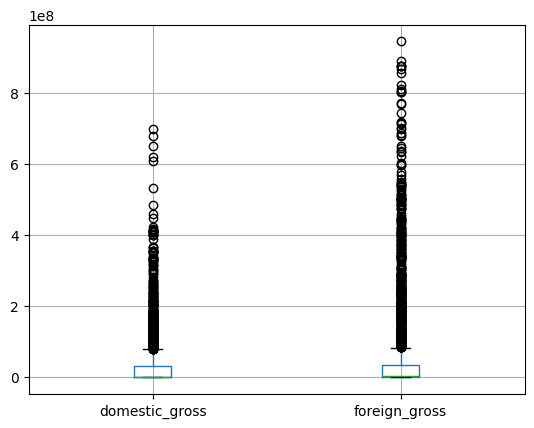

In [31]:
#basics_ratings_moviegross = ['averagerating', 'numvotes', 'runtime_minutes', 'domestic_gross', 'foreign_gross']
#basics_ratings_moviegross_columns = ['averagerating', 'numvotes']
basics_ratings_columns = ['domestic_gross', 'foreign_gross']
basics_ratings_moviegross_merge.boxplot(column=basics_ratings_columns)

<Axes: >

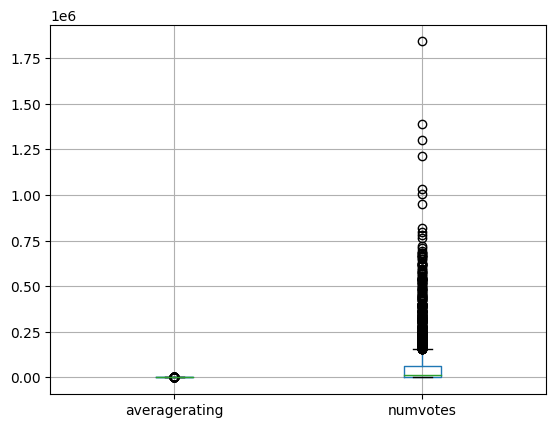

In [32]:
basics_ratings_moviegross_columns = ['averagerating', 'numvotes']
basics_ratings_moviegross_merge.boxplot(column=basics_ratings_moviegross_columns)

# Data Analysis

In [33]:
#Load matplotlib and seaborn libraries
#Pandas library had been loaded at the begining of this notebook

import matplotlib.pyplot as plt
import seaborn as sns

Guiding questions:

1.   Which year were the movies most rated?
2.   Which studio has the highest rating?
3.   Do movies with high ratings also dictate a high grossing?



***Analysis No. 1***

Analyse the movie ratings per year; working with a period of 5 years (2014-2018).

In [34]:
#Analyse how well movies are liked or disliked by checking the average ratings and how many times they were counted.
basics_ratings_moviegross_merge['averagerating'].value_counts()

6.8    143
6.4    142
6.6    141
6.3    139
7.2    136
      ... 
2.5      1
2.1      1
8.9      1
9.0      1
1.9      1
Name: averagerating, Length: 71, dtype: int64

<Axes: >

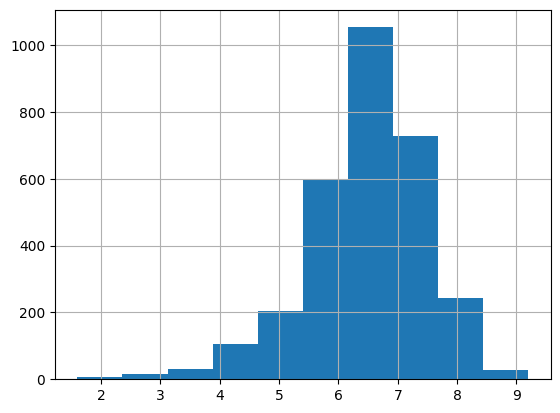

In [35]:
basics_ratings_moviegross_merge['averagerating'].hist(bins=10)

From the above histogram, the distribution of the movies ratings is fairly symmetric with a center at around 6 and 7.

Most of the movies have been rated between 5.5 and 7.5, with 6.5 being the rating for most movies.



In [36]:
basics_ratings_moviegross_merge.averagerating.value_counts().describe()

count     71.000000
mean      42.492958
std       47.203472
min        1.000000
25%        5.000000
50%       19.000000
75%       76.000000
max      143.000000
Name: averagerating, dtype: float64

<Axes: >

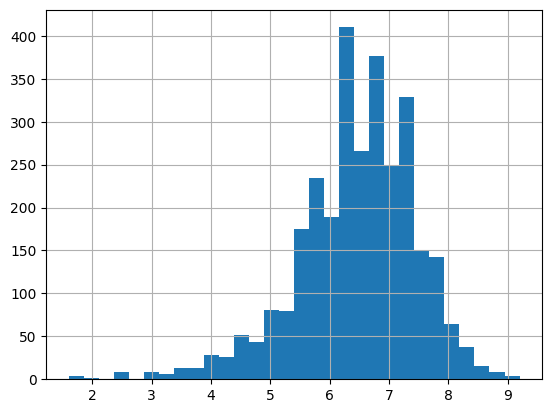

In [37]:
basics_ratings_moviegross_merge['averagerating'].hist(bins=30)

The mean(42.492958) is greater than the median(19) meaning the data is skewed to the right.

In [38]:
year_rating = basics_ratings_moviegross_merge["year"].astype(int) < 2019
movieprodcount = (basics_ratings_moviegross_merge[year_rating][["year", "tconst"]]
             .groupby("year")
             .count()
            )

<Axes: title={'center': 'Movie Rating per Year'}, xlabel='year'>

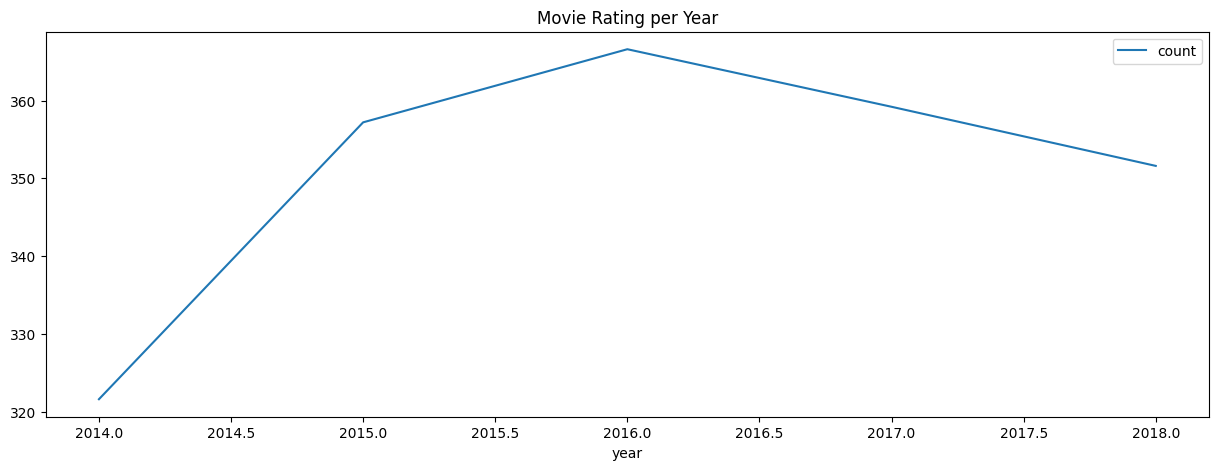

In [59]:
(movieprodcount
 .rolling(5).mean().rename(columns={"tconst":"count"})
 .plot(figsize=(15,5),
       title="Movie Rating per Year")
)

The above is a statistics of movie ratings within a 5 year period.

The year is 2016 when movies were rated the most, however after 2016 there was a decline in movie rating probably meaning people stopped watching movies as often as they would in 2014 or the movies were being watched but not rated.

There could also be a possibilty that movie production from 2017 was on a decline causing people to have very few movies to watch.

***Analysis no.2:***

Analyse whether movies with a higher rating have a higher domestic gross.

In [40]:
# sample 10 movie ratings with their domestic gross
rate_gross = basics_ratings_moviegross_merge[['averagerating', 'domestic_gross']]
rate_gross.sample(10)

,averagerating,domestic_gross
14745,5.9,120000.0
25008,4.6,7000000.0
15310,6.3,30500000.0
19818,5.7,50700000.0
14251,7.0,3400000.0
57489,3.6,51700000.0
729,5.8,80600000.0
60580,6.4,5700000.0
40763,4.3,38900.0
59538,6.0,74900.0


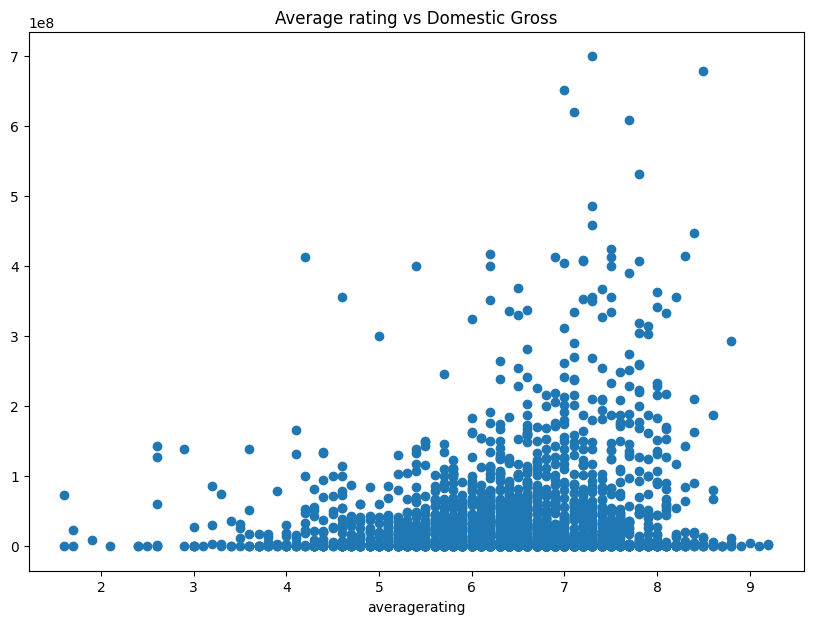

In [41]:
# plotting the data above
rate_gross.plot(x='averagerating', y='domestic_gross', style='o', figsize=(10,7), title = "Average rating vs Domestic Gross",
            legend = False, );

From the analysis above, we can conclude that movies with a high rating do not necessary result to a high grossing. Some movies from the samples are rated below 5 but with a very high grossing.

***Analysis No.3:***

Explore the average rating per studio to determine if the studio producing the movies matter.

In [53]:
studio_rating = basics_ratings_moviegross_merge[['studio', 'averagerating']]
studio_rating.sample(10)

,studio,averagerating
14214,LGP,4.8
28906,Relbig.,7.1
25084,MBox,6.1
12678,FM,7.1
48477,Anch.,6.1
37892,AM,6.3
52582,RAtt.,6.8
46543,IFC,7.1
59249,EOne,6.1
12594,WB,6.3


<Axes: xlabel='studio'>

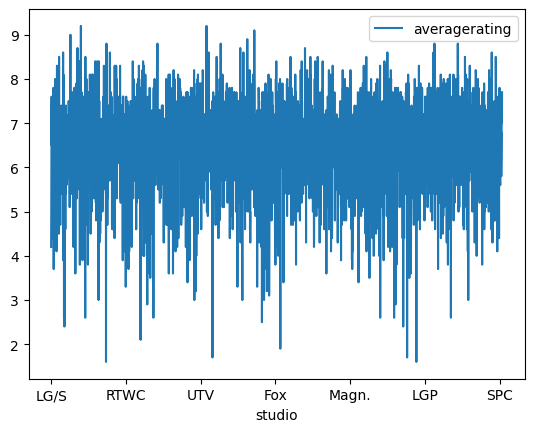

In [48]:
basics_ratings_moviegross_merge.plot(x='studio', y='averagerating', kind='line')

The studio producing the films determines how well the movie is received and rated as per the ananlysis above.